In [2]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import xarray as xr

In [3]:
data_path = '../../../../Downloads/dataset-ecv-for-climate-change-8e306aed-835f-40ba-87a9-d6defa890946/1month_mean_Global_ea_r2_202201_v02.grib' # Set the file name of your input GRIB file
original_data = xr.open_dataset(data_path, engine="cfgrib")

In [4]:
grb = grbs.select()[0]
data = grb.values

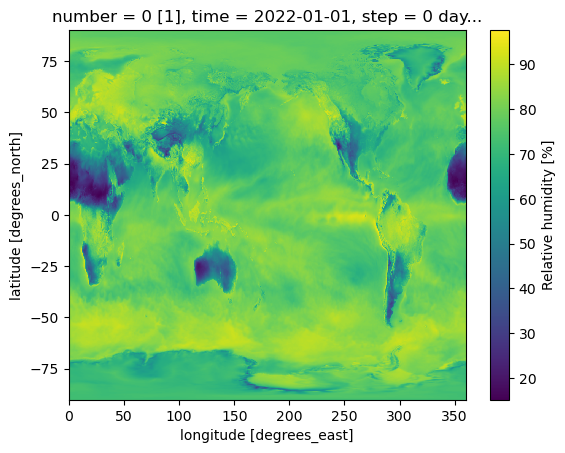

In [6]:
original_data['r'].plot()

/Users/qingyao/anaconda3/envs/geo/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/qingyao/anaconda3/envs/geo/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/qingyao/anaconda3/envs/geo/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


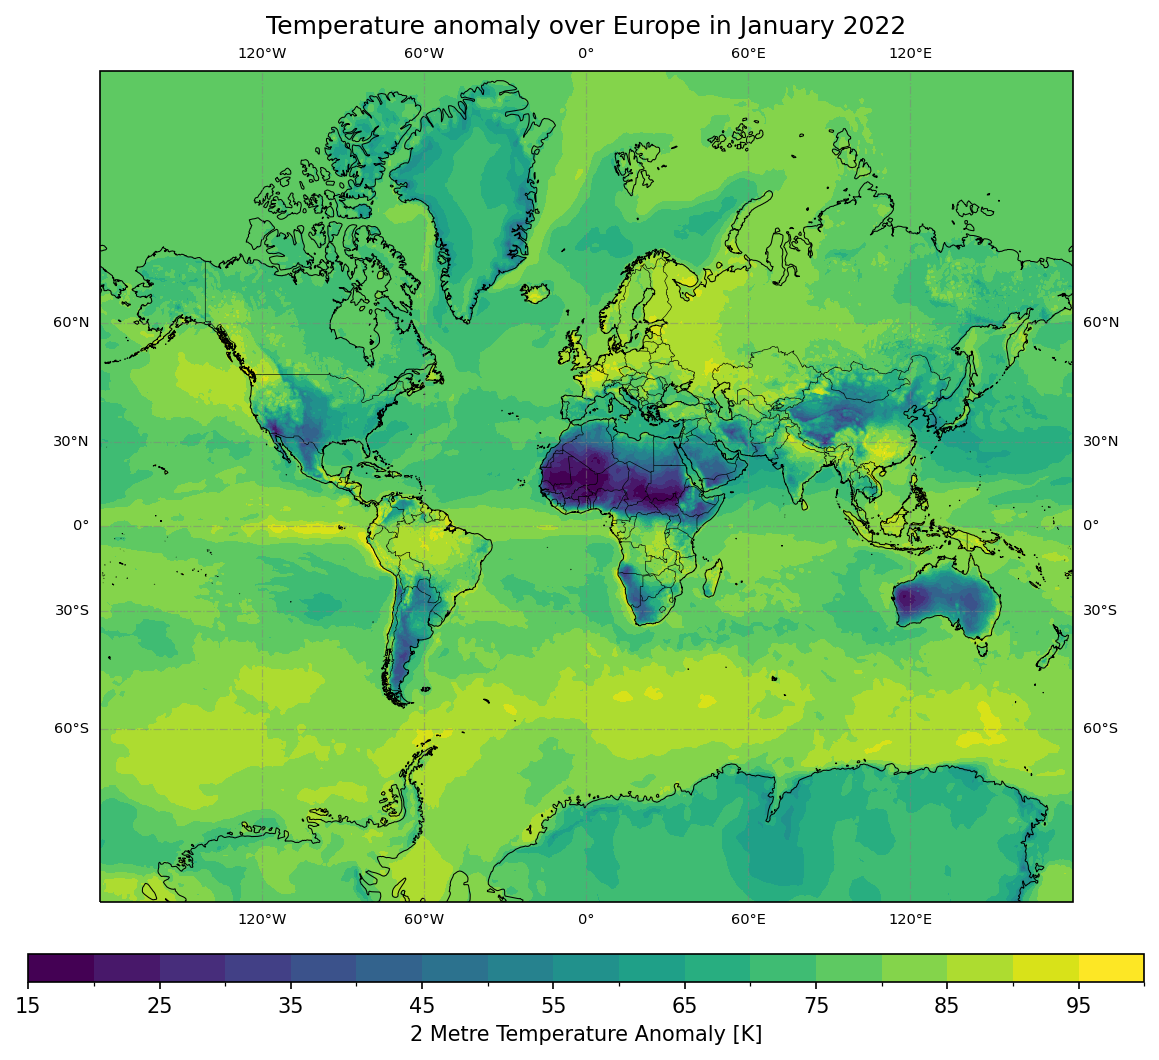

In [9]:
def plot_dataset(dataset : xr.Dataset):
    # First we specify Coordinate Refference System for Map Projection
    # We will use Mercator, which is a cylindrical, conformal projection. 
    # It has bery large distortion at high latitudes, cannot 
    # fully reach the polar regions.
    projection = ccrs.Mercator()
    # Specify CRS, that will be used to tell the code, where should our data be plotted
    crs = ccrs.PlateCarree()
    # Now we will create axes object having specific projection 
    plt.figure(figsize=(16,9), dpi=150)
    ax = plt.axes(projection=projection, frameon=True)
    # Draw gridlines in degrees over Mercator map
    gl = ax.gridlines(crs=crs, draw_labels=True,
                    linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
    gl.xlabel_style = {"size" : 7}
    gl.ylabel_style = {"size" : 7}
    # To plot borders and coastlines, we can use cartopy feature
    import cartopy.feature as cf
    ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
    ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)
    
    # Now, we will specify extent of our map in minimum/maximum longitude/latitude
    # Note that these values are specified in degrees of longitude and degrees of latitude
    # However, we can specify them in any crs that we want, but we need to provide appropriate
    # crs argument in ax.set_extent
    # crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
#     lon_min = -20
#     lon_max = 45
#     lat_min = 34
#     lat_max = 60
   
    ##### WE ADDED THESE LINES #####
    cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .05, 'aspect':40, 'label':'2 Metre Temperature Anomaly [K]'}
    dataset["r"].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21)
    ################################
    
#     ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
    plt.title(f"Temperature anomaly over Europe in {dataset.valid_time.dt.strftime('%B %Y').values}")
    plt.show()

plot_dataset(original_data)

In [10]:
import geopandas